In [137]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
import math
import random

%matplotlib inline

In [138]:
measurements = [x for x in range(1,10)]

x = np.array([[0.], [0.]]) # initial state (location and velocity)
P = np.array([[1000., 0.], [0., 1000.]]) # initial uncertainty
u = np.array([[0.], [0.]]) # external motion
F = np.array([[1., 1.], [0, 1.]]) # next state function
H = np.array([[1., 0.]]) # measurement function
R = np.array([[1.]]) # measurement uncertainty
I = np.array([[1., 0.], [0., 1.]]) # identity matrix



In [139]:
def feed_meas(x, P, m):
    z = np.array([[m]]) # z - measurement matrix
    
    y = z - np.dot(H,x) # error : previous state - measurement X measurement matrix
    S = np.dot(np.dot(H,P), H.transpose()) + R
    K = np.dot(np.dot(P, H.transpose()), np.linalg.inv(S)) # kalman gain
    
    x = x + np.dot(K, y) # new state : x + kalman gain X error
    P = np.dot((I - np.dot(K, H)), P) # adjusting uncertainty covariance
    
    return x, P

def predict_next_state(x, P, u):
    x = np.dot(F, x) + u # new state : movement matrix X current state + movement
    P = np.dot(np.dot(F, P), F.transpose()) # adjusting covar matrix 
    
    return x, P

In [140]:

# Implement the filter function below
l = []

def kalman_filter(x, P):
    for n in range(len(measurements)):
        x, P = feed_meas(x, P, measurements[n])
        print ('Step', n, 'after feeding m',measurements[n], x)
        x, P = predict_next_state(x, P, u)
        print ('Step', n, 'prediction', x)
        
        l.append(x)
        


In [141]:
kalman_filter(x, P)

Step 0 after feeding m 1 [[ 0.999001]
 [ 0.      ]]
Step 0 prediction [[ 0.999001]
 [ 0.      ]]
Step 1 after feeding m 2 [[ 1.999001]
 [ 0.999002]]
Step 1 prediction [[ 2.99800299]
 [ 0.999002  ]]
Step 2 after feeding m 3 [[ 2.99966661]
 [ 0.99999983]]
Step 2 prediction [[ 3.99966644]
 [ 0.99999983]]
Step 3 after feeding m 4 [[ 3.99989989]
 [ 1.00009986]]
Step 3 prediction [[ 4.99999975]
 [ 1.00009986]]
Step 4 after feeding m 5 [[ 4.9999999 ]
 [ 1.00009991]]
Step 4 prediction [[ 6.00009981]
 [ 1.00009991]]
Step 5 after feeding m 6 [[ 6.00004753]
 [ 1.00008565]]
Step 5 prediction [[ 7.00013319]
 [ 1.00008565]]
Step 6 after feeding m 7 [[ 7.00007136]
 [ 1.00007139]]
Step 6 prediction [[ 8.00014274]
 [ 1.00007139]]
Step 7 after feeding m 8 [[ 8.00008327]
 [ 1.00005949]]
Step 7 prediction [[ 9.00014277]
 [ 1.00005949]]
Step 8 after feeding m 9 [[ 9.00008884]
 [ 1.00004998]]
Step 8 prediction [[ 10.00013882]
 [  1.00004998]]


In [142]:
l = np.array(l)

In [143]:
l = l.reshape(9,2)

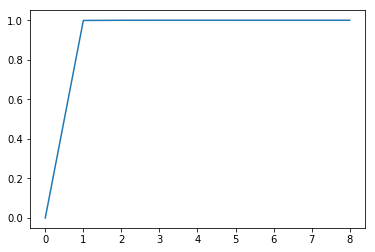

In [144]:
plt.plot(l[:,1])